## Regression assignment

In [181]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os.path

# to make this notebook's output stable across runs
rnd.seed(4)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."

def save_fig(fig_id, tight_layout=True):
    image_dir = os.path.join(PROJECT_ROOT_DIR, "images")
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)
    path = os.path.join(image_dir, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Loading the data 

This is Kaggle data on California housing which has been copied to my website to evade updates.

In [182]:
import pandas as pd
HOUSING_PATH = "http://gawron.sdsu.edu/housing.csv"
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = housing_path#os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [183]:
df = load_housing_data()
#  We need no NaNs for what follows.  This is 
#  a big hammer, but put probably ok for what we're doing
df.fillna(0)
print(df.shape)
df

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [184]:
import numpy as np
from sklearn.preprocessing import scale

X,Y = df.median_income.values, df.median_house_value.values
Z = np.vstack([X,Y]).T
print("Med. Inc.|Med. Hou. |Z shape | Samp. Inc. | Samp. Hou.| Samp. Z")
print(X.shape,Y.shape,Z.shape,X[0],Y[0],Z[0])
#plt.scatter(X,Y)

Med. Inc.|Med. Hou. |Z shape | Samp. Inc. | Samp. Hou.| Samp. Z
(20640,) (20640,) (20640, 2) 8.3252 452600.0 [8.3252e+00 4.5260e+05]


What would happend if we centered and scaled data.  

May not be useful for every problem.

In [185]:
Z_scale = scale(Z,axis=0)
#print(Z_scale.shape)
print("         Med. inc. Med. hou.             STD inc. STD hou. ")
print(f" Data Mn:   {Z[:,0].mean():0.2f}   {Z[:1].mean():,.0f}"
      f"        Data STD: {Z[:,0].std():0.2f}  {Z[:1].std():,.0f}\n"
      f" Scaled Mn: {Z_scale[:,0].mean(): 0.1f}  {Z_scale[:,1].mean(): 0.1f}"
      f"          Scaled STD: {Z_scale[:,0].std():0.2f}   {Z_scale[:1].std():0.2f}\n")

         Med. inc. Med. hou.             STD inc. STD hou. 
 Data Mn:   3.87   226,304        Data STD: 1.90  226,296
 Scaled Mn:  0.0  -0.0          Scaled STD: 1.00   0.11



#### Example:  Plot total_bedrooms versus households.

In [186]:
by_households = df.sort_values(by=['households'])

<AxesSubplot:xlabel='households'>

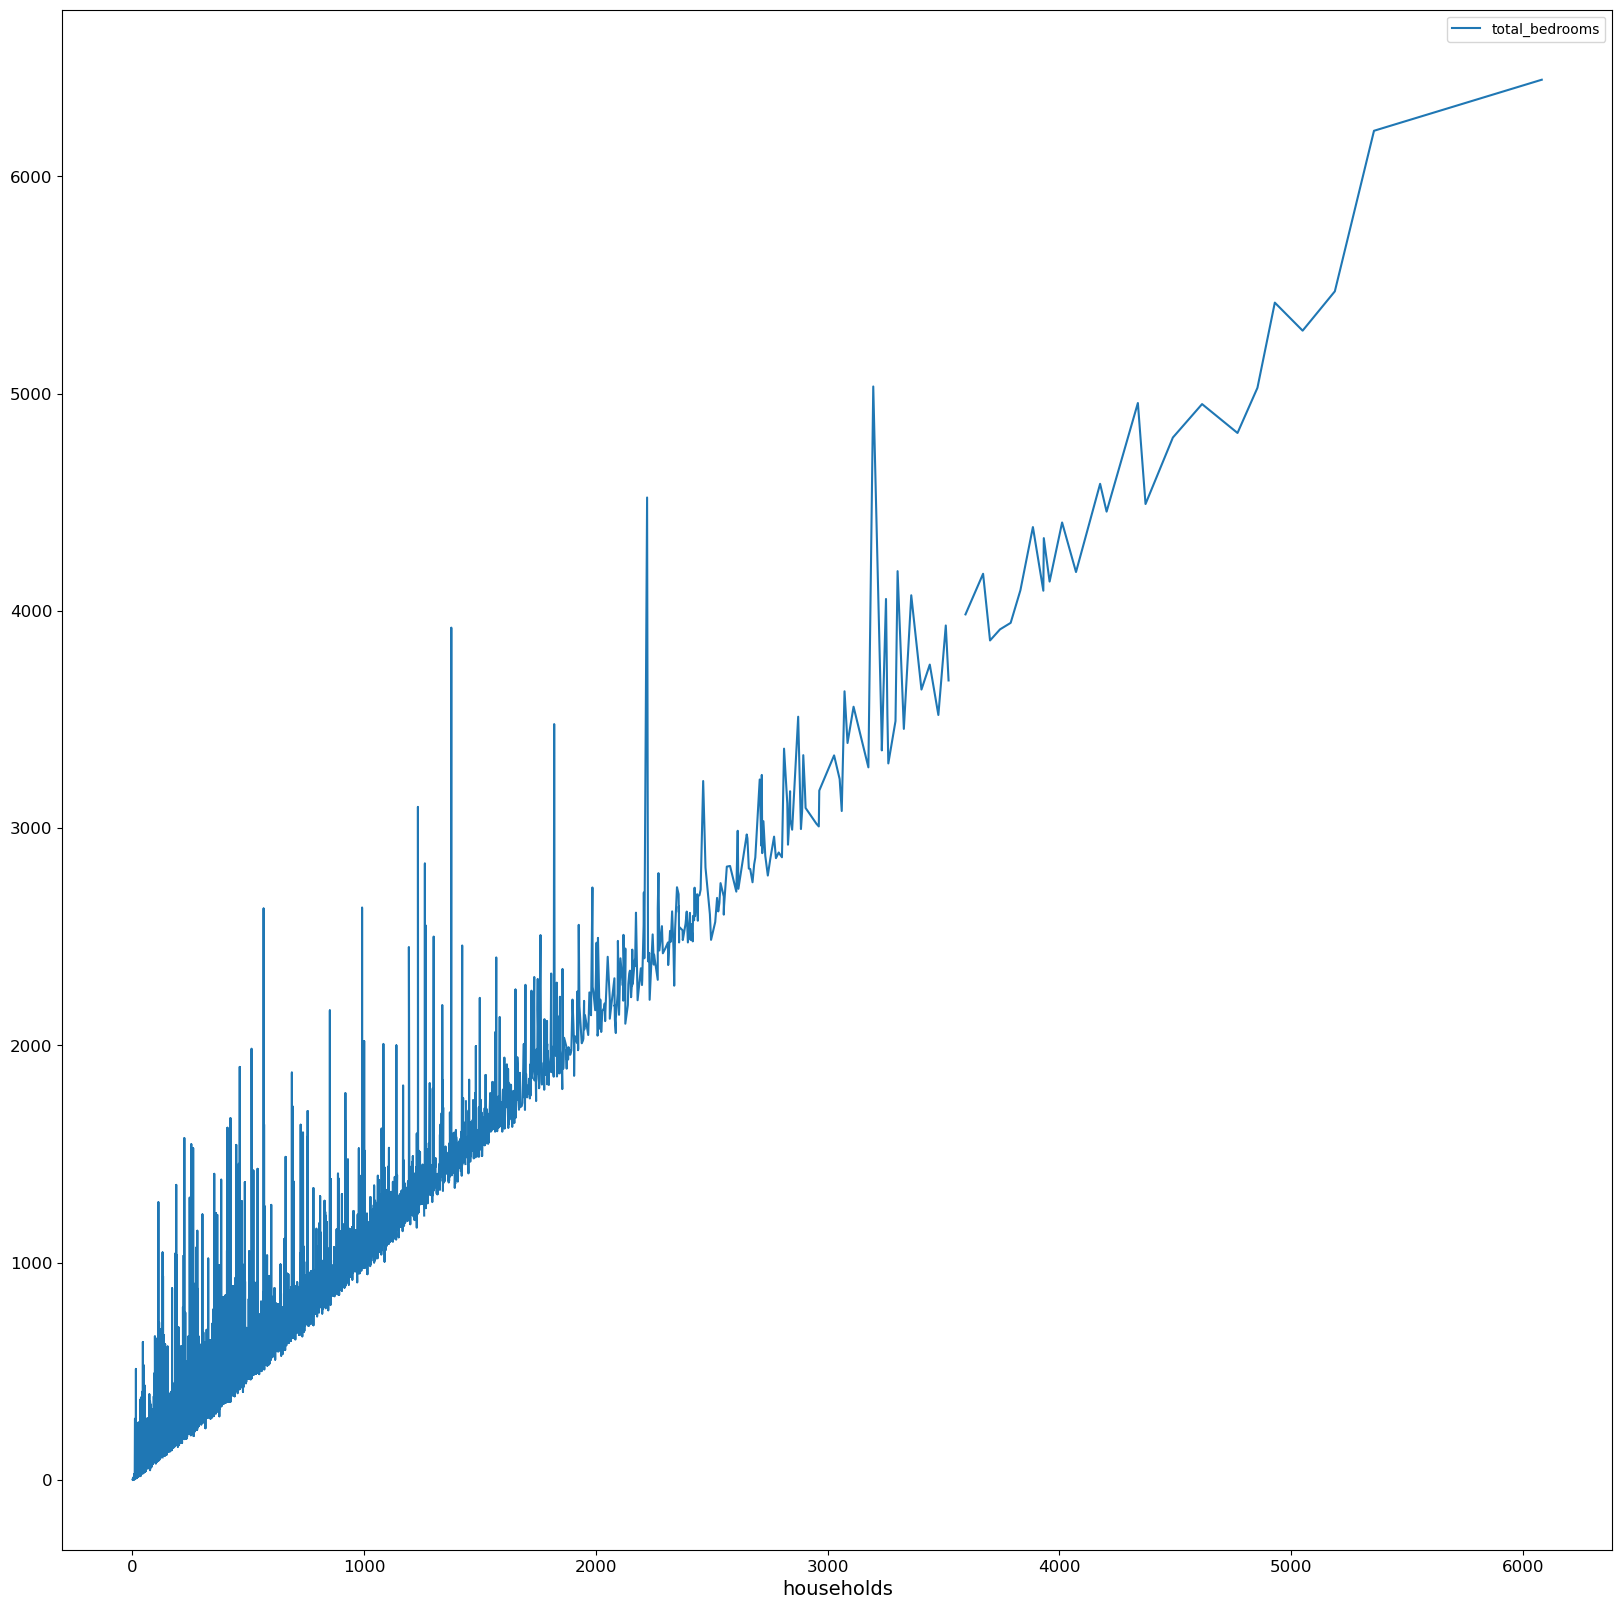

In [187]:
by_households.plot(x='households',y='total_bedrooms',figsize=(20,20))

Doesn't really make sense to draw a **line** here visually.  Increasing number
of households **generally** increases number of bedrooms, but a small increase
in one does not with perfect reliability predict a small increase in the other.
Hence the zigzagging.

Also, for similar reasons, possibly not a function.  Two different
communities **might** have exactly the same number of hoiuseholds,
bit not exactly the same number of total bedrooms.

Let's do some binning: we'll round off to the nearest 50 and take the mean number
of bedrooms for each bin.

In [188]:
import pandas as pd

# Bins: households rounded off to the nearest 50
by_households['Households Level'] = \
         by_households['households'].apply(lambda x: 50 * (x // 50))
bh_pivot = pd.pivot_table(by_households, 
                    values='total_bedrooms',
                    index= 'Households Level',
                    aggfunc=np.mean)
bh_pivot

,total_bedrooms
Households Level,
0.0,46.720365
50.0,97.358314
100.0,161.683043
150.0,199.337266
200.0,245.075658
...,...
4900.0,5419.000000
5050.0,5290.000000
5150.0,5471.000000


The newly created pivot table now produces a plot that tells the story:  Exception  for a few bins in the middle range of households, the average number of bedrooms in this data set is very close to 1.  (The line we're plotting is y=x).

Text(0, 0.5, 'Bedrooms')

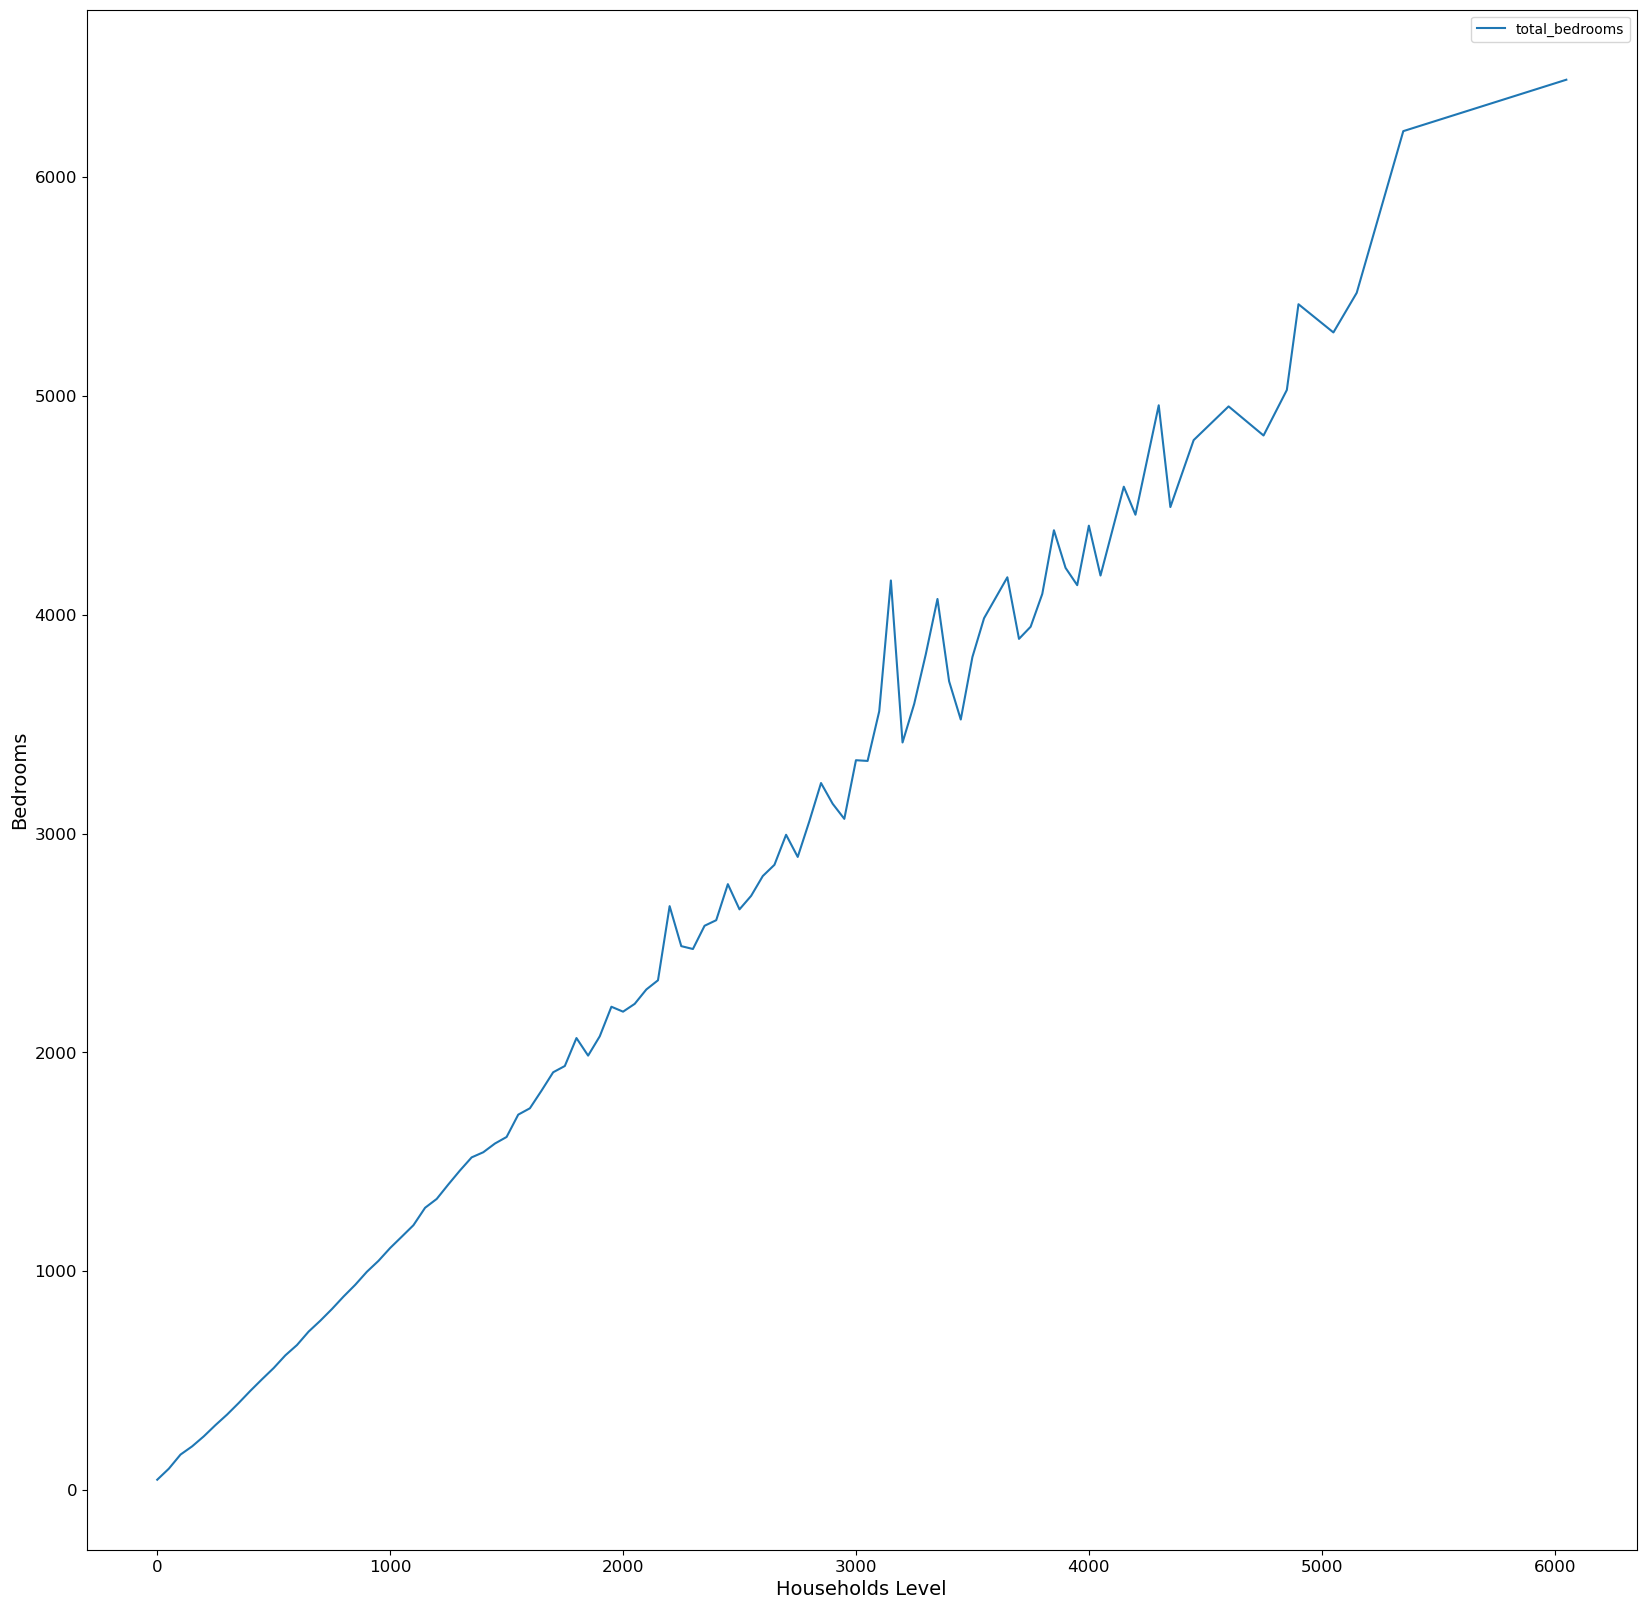

In [189]:
#plt.plot(Z_scale[:,0],Z_scale[:,1])
#bh_pivot.plot(x='households_level',y='index')
fig, ax = plt.subplots(1,1)
bh_pivot.plot(figsize=(20,20),ax=ax)
plt.ylabel('Bedrooms')

## The Regression Problem

We'll use this form of the data, introduced in the assignment NB. It has a new column called Households level.

In [190]:
by_households

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Households Level
16171,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,500001.0,NEAR BAY,0.0
12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,INLAND,0.0
2511,-119.54,36.51,36.0,49.0,7.0,28.0,2.0,4.6250,162500.0,INLAND,0.0
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0,INLAND,0.0
16888,-122.37,37.60,26.0,15.0,3.0,11.0,3.0,5.0480,350000.0,NEAR OCEAN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8985,-118.44,33.98,21.0,18132.0,5419.0,7431.0,4930.0,5.3359,500001.0,<1H OCEAN,4900.0
6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN,5050.0
10309,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN,5150.0
13139,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND,5350.0


The model in the assignment,

In [191]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


bh = by_households
# Get rid of house values of 500_000 or over
sensible_df = bh[bh.median_house_value < 500_000]
income_train, income_test, y_train,y_test = train_test_split(sensible_df[['median_income']],
                                                             sensible_df[['median_house_value']])
Xsample = income_train[["median_income"]]

Ysample = y_train # income_train[["median_house_value"]]

lin1 = linear_model.LinearRegression()

lin1.fit(Xsample,Ysample)

vals_lin = lin1.predict(income_test[["median_income"]])
lin_mse = mean_squared_error(y_test["median_house_value"],vals_lin)

lin_r2 = r2_score(y_test[["median_house_value"]], vals_lin)

np.sqrt(lin_mse),lin_r2

(74630.07840664628, 0.41777231360252787)

To improve, try an inferred interaction column.  Details of how we define it matter

In [192]:
by_households['avg_br_lev'] = by_households['total_bedrooms']/by_households['Households Level']
# Less of a strong correlation.  
by_households['avg_br'] = by_households['total_bedrooms']/by_households['households']

Check correlations with dependent var,

In [193]:
by_households.corr(numeric_only=True)['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Households Level      0.066211
avg_br_lev           -0.080977
avg_br               -0.046739
Name: median_house_value, dtype: float64

```
San Diego      lat 32.7157° N
San Francisco  lat 37.7749° N
Mendocino      lat 39.3077° N
```

#### One-hot encoding

Convert the information in the Ocean Proximity column into a form usable by regression.



In [212]:
one_hot_encodings = by_households['ocean_proximity'].str.get_dummies()
ocean_prox_cols = one_hot_encodings.columns
one_hot_encodings

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16171,0,0,0,1,0
12286,0,1,0,0,0
2511,0,1,0,0,0
3126,0,1,0,0,0
16888,0,0,0,0,1
...,...,...,...,...,...
8985,1,0,0,0,0
6057,1,0,0,0,0
10309,1,0,0,0,0
13139,0,1,0,0,0


What we're doing is called **one-hot encoding** by the rest of the world.  For some reason (historical?)
the method that implements this on a categorical column (calues are all strings) is called `get_dummies` in pandas.

The idea of one-hot encoding doesn't really have that much to do with whether the column value set is all strings.
It's about whether it's **categorical**.
If one had  a column `C` with a value set in the integer range (0,1,2,3,4),
and these were simply encodings of some category (entities of category 3 are no closer to
entities of category 4 than entities of category 0), then it would be much
better to use one-hot encoding than to use the numbers in `C` for regression.

In [213]:
new_df = pd.concat([by_households,one_hot_encodings],axis=1)

Alternative way of adding the ocean proximity cols:

In [91]:
#new_df = df.copy()

#n_op_levels = df['ocean_proximity'].nunique()
#for p in df['ocean_proximity'].unique():
#    new_df[p] = df['ocean_proximity'] == p
    

Some of the new columns are promising.

In [195]:
new_df.corr(numeric_only=True)['median_house_value']

longitude            -0.046433
latitude             -0.143923
housing_median_age    0.109536
total_rooms           0.134543
total_bedrooms        0.049351
population           -0.027599
households            0.064681
median_income         0.695652
median_house_value    1.000000
Households Level      0.065074
avg_br_lev           -0.080977
avg_br               -0.070189
<1H OCEAN             0.257124
INLAND               -0.486272
ISLAND                0.023758
NEAR BAY              0.160529
NEAR OCEAN            0.140676
Name: median_house_value, dtype: float64

The columns we'll call interesting.

In [196]:
corr_df = new_df.corr(numeric_only=True)
corr_df[np.abs(corr_df['median_house_value'])>.06]['median_house_value']

latitude             -0.143923
housing_median_age    0.109536
total_rooms           0.134543
households            0.064681
median_income         0.695652
median_house_value    1.000000
Households Level      0.065074
avg_br_lev           -0.080977
avg_br               -0.070189
<1H OCEAN             0.257124
INLAND               -0.486272
NEAR BAY              0.160529
NEAR OCEAN            0.140676
Name: median_house_value, dtype: float64

Note housing avg_br has a weak anti correlation;median age has a weak correlation.

Latitude, housing median age, total_rooms and our ocean proximity cols all have decent info

In [197]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

def new_system_trial (X, y, num_trials, scores, clf, **params):
    for i in range(num_trials):
        newX = sensible_df[new_ind_vars]
        X_train, X_test, y_train,y_test = train_test_split(newX, y)
        #print(newX.shape,type(newX),len(X_train),len(X_test),)
        #lin1 = linear_model.LinearRegression()
        clf_inst = clf(**params)
        clf_inst.fit(X_train,y_train)
        predicted = clf_inst.predict(X_test)

        clf_mse = mean_squared_error(y_test,predicted)
        clf_r2 = r2_score(y_test, predicted)
        n,p = X_test.shape[0],X_test.shape[1]
        adj_clf_r2 = adj_r2(clf_r2, n, p)

        scores[i] = clf_mse, clf_r2, adj_clf_r2
    return newX

def print_mn_scores(mn_sc,newX):
    print (f"MRE {np.sqrt(mn_sc[0]):,.0f}  R2 {mn_sc[1]:.3f}   Adj_R2 {mn_sc[2]:.3f}")
    print(list(newX.columns))
    print()

def adj_r2 (r2, n, p):
    #A 1-(1-R2)*(n-1)/(n-p) 
    return 1-((1-r2)*(n-1)/(n-p))

We choose the median income plus the ocean proximity columns as our core system.
All systems we experiment with will include those columns.  Then we
add subsets from the columns discovered above.

In [255]:
core

['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

Last cols are new!

In [382]:
new_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'Households Level', 'avg_br',
       'avg_br_lev', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

### Some numerical cleanup

In [198]:
new_df.avg_br

8221     0.820000
13999    2.040000
20108    1.140000
13374    1.960000
365      1.080000
           ...   
8985     1.099189
6057     1.047525
10309    1.054346
13139    1.159015
9880     1.059684
Name: avg_br, Length: 20104, dtype: float64

In [199]:
new_df = new_df.replace([np.inf, -np.inf], np.nan)
new_df = new_df.dropna(subset=['avg_br','avg_br_lev'])

Our data is artificially capped.   Fix that by removing all those houses that
cost EXACTLY 500_000.

In [200]:
sensible_df = new_df[new_df.median_house_value < 500_000]

In [201]:
sensible_df.median_house_value.max()

499100.0

#### Finding the best linear model

In [210]:
new_ind_vars

['median_income',
 array([0, 0, 0, 1, 0]),
 array([0, 1, 0, 0, 0]),
 array([0, 1, 0, 0, 0]),
 array([0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 1]),
 array([0, 1, 0, 0, 0]),
 array([0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 1]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0]),
 array([1, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0]),
 array([0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 1]),
 array([0, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0]),
 array([0, 1, 0, 0, 0]),
 array([0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0]),
 array([0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 1]),
 array([0, 0, 0, 1, 0]),
 array([0, 1, 0, 0, 0]),
 array([0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0]),
 array([0, 1, 0, 0, 0]),
 array([0, 0, 0, 1, 0]),
 array([0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0]),
 array(

In [214]:
sensible_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,Households Level,avg_br_lev,avg_br,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8221,-118.22,33.79,48.0,143.0,41.0,222.0,50.0,1.7000,104200.0,NEAR OCEAN,50.0,0.820000,0.820000,0,0,0,0,1
13999,-116.90,34.69,10.0,337.0,102.0,108.0,50.0,0.4999,55000.0,INLAND,50.0,2.040000,2.040000,0,1,0,0,0
20108,-120.35,37.86,25.0,287.0,57.0,118.0,50.0,2.3056,162500.0,INLAND,50.0,1.140000,1.140000,0,1,0,0,0
13374,-117.51,34.16,2.0,718.0,98.0,119.0,50.0,4.1000,315000.0,INLAND,50.0,1.960000,1.960000,0,1,0,0,0
365,-122.13,37.75,30.0,414.0,54.0,137.0,50.0,4.9750,311100.0,NEAR BAY,50.0,1.080000,1.080000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12623,-121.53,38.48,5.0,27870.0,5027.0,11935.0,4855.0,4.8811,212200.0,INLAND,4850.0,1.036495,1.035427,0,1,0,0,0
6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN,5050.0,1.047525,1.047525,1,0,0,0,0
10309,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN,5150.0,1.062330,1.054346,1,0,0,0,0
13139,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND,5350.0,1.160748,1.159015,0,1,0,0,0


In [215]:

num_trials = 100
core = ['median_income',] + list(ocean_prox_cols)
use_levels= 1
household_var  = ['households','Households Level'][use_levels]
bedroom_var  = ['avg_br','avg_br_lev'][1]
additional = np.array(['latitude','total_rooms','housing_median_age',household_var,
                        bedroom_var])
#additional = np.array(['latitude','total_rooms','housing_median_age','avg_br'])
#additional = np.array(['latitude','housing_median_age','avg_br'])

#alts = powerset((0,1,2))
alts = powerset(list(range(len(additional))))
num_experiments = len(list(alts)) + 1
scores = np.zeros((num_experiments,num_trials,3))

#  Indices for choosing subsets pf additions
alts = powerset(list(range(len(additional))))
system = []

# Include the assigned system first for a baseline
new_ind_vars = ['median_income']
newX,y = sensible_df[new_ind_vars], sensible_df['median_house_value']
new_system_trial (newX, y, num_trials, scores[0], linear_model.LinearRegression)
mn_sc = scores[0].mean(axis=0)
print_mn_scores(mn_sc, newX)

#  Now iterate  through all subsets of the chosen features regression and evaluating
for (exp,idxs) in enumerate(alts):
    chosen = additional[list(idxs)]
    system.append(chosen)
    exp= exp+1
    new_ind_vars = core + list(chosen)
    newX = sensible_df[new_ind_vars]
    new_system_trial (newX, y, num_trials, scores[exp],linear_model.LinearRegression)
    mn_sc = scores[exp].mean(axis=0)
    print_mn_scores(mn_sc, newX)

MRE 73,251  R2 0.427   Adj_R2 0.427
['median_income']

MRE 63,763  R2 0.568   Adj_R2 0.567
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

MRE 63,804  R2 0.567   Adj_R2 0.567
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude']

MRE 63,730  R2 0.569   Adj_R2 0.568
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'total_rooms']

MRE 63,051  R2 0.577   Adj_R2 0.576
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'housing_median_age']

MRE 63,520  R2 0.570   Adj_R2 0.569
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'Households Level']

MRE 63,792  R2 0.566   Adj_R2 0.566
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'avg_br_lev']

MRE 63,643  R2 0.569   Adj_R2 0.568
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'total_rooms']

MRE 63,049  R2 0.578   Adj_R2 0.577
[

Results from previous runs, showing variation , even when averaging over 100 splits:

```

MRE 74,026  R2 0.418   Adj_R2 0.418
['median_income']

MRE 64,676  R2 0.557   Adj_R2 0.556
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

MRE 64,573  R2 0.558   Adj_R2 0.558
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude']

MRE 64,437  R2 0.559   Adj_R2 0.558
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'total_rooms']

MRE 64,045  R2 0.565   Adj_R2 0.564
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'housing_median_age']

MRE 64,389  R2 0.560   Adj_R2 0.559
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'total_rooms']

MRE 63,997  R2 0.566   Adj_R2 0.565
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'housing_median_age']

MRE 63,649  R2 0.570   Adj_R2 0.569
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'total_rooms', 'housing_median_age']

MRE 63,653  R2 0.571   Adj_R2 0.570
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age']

MRE 61,849  R2 0.593   Adj_R2 0.592
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'total_rooms', 'housing_median_age', 'households', 'avg_br']

```

### A nonlinear model

Let's try a random forest model on the feature set that works best, although we're
going to see that screening our feature choices by using the results of a linear model
is quite risky.

In [217]:
import sklearn
from sklearn import ensemble
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble

#new_ind_vars = ['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 
#                'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age', 'Households Level']
# The next one is unexpectedly bad (0.525), if you comment out "latitide"
# despite that combo being quite competitive (.592) with the linear model
new_ind_vars = ['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 
               'total_rooms', 'housing_median_age', 'avg_br',
               'latitude', 
               ]
#new_ind_vars = ['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 
#                'total_rooms', 'housing_median_age', 'households', 'avg_br']

# The next one is unexpectedly bad (0.540), despite being quite competitive (.589) with the linear model
#new_ind_vars = ['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 
#                'total_rooms', 'housing_median_age', 'households']

newX,y = sensible_df[new_ind_vars], sensible_df['median_house_value']

num_trials = 100
scores =np.zeros((num_trials,3))

#linear_model.LinearRegression
new_system_trial (newX, y, num_trials, scores, ensemble.RandomForestRegressor, n_estimators=5)
#new_system_trial (newX, y, num_trials, scores, linear_model.LinearRegression)
mn_sc = scores.mean(axis=0)
print_mn_scores(mn_sc, newX)

MRE 58,988  R2 0.629   Adj_R2 0.628
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'total_rooms', 'housing_median_age', 'avg_br', 'latitude']



Best model yet.

```
MRE 60,075  R2 0.618   Adj_R2 0.617
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age']
```
```
MRE 59,440  R2 0.626   Adj_R2 0.625
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age', 'Households Level']
```

```
MRE 59,232  R2 0.627   Adj_R2 0.626
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age', 'avg_br']

!!! MRE 65,925  R2 0.537   Adj_R2 0.536
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'total_rooms', 'housing_median_age', 'households']

!! MRE 65,718  R2 0.541   Adj_R2 0.540
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'total_rooms', 'housing_median_age', 'households']



```


#### How about a polynomial model?

The next model is a little bit of a roller coaster ride.  The result below is quite good.  And this
regressor (being computationally linear) is quite fast.

But try adding 'households' to the feature set.

In [218]:
import sklearn
from sklearn import ensemble
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import ensemble


def make_polynomial_regressor (degree=2):
    return make_pipeline(
                         PolynomialFeatures(degree=degree),
                         linear_model.LinearRegression())


#new_ind_vars = ['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 
#                'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age', 'Households Level']
#new_ind_vars = ['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 
#               'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age']
new_ind_vars = ['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 
               'total_rooms', 'housing_median_age', 'avg_br',
               'latitude', 
               ]

newX,y = sensible_df[new_ind_vars], sensible_df['median_house_value']

num_trials = 100
scores =np.zeros((num_trials,3))

#linear_model.LinearRegression
new_system_trial (newX, y, num_trials, scores, make_polynomial_regressor, degree=2)
#new_system_trial (newX, y, num_trials, scores, linear_model.LinearRegression)
mn_sc = scores.mean(axis=0)
print_mn_scores(mn_sc, newX)

MRE 60,296  R2 0.613   Adj_R2 0.613
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'total_rooms', 'housing_median_age', 'avg_br', 'latitude']



## Ideas that don't work

### Unsupervised reduction

Call this regressor PCR:  Use PCA.  Scale data first.  Then do linear regression.

In [240]:
import sklearn
from sklearn import ensemble
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble
from sklearn.decomposition import PCA


new_ind_vars = ['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 
                'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age', 'Households Level']
newX,y = sensible_df[new_ind_vars], sensible_df['median_house_value']

num_trials = 10
scores =np.zeros((num_trials,3))

def make_PCA_regressor (n_components=10):
    return make_pipeline(StandardScaler(), PCA(n_components=n_components), linear_model.LinearRegression())


new_system_trial (newX, y, num_trials, scores, make_PCA_regressor,n_components=1)
mn_sc = scores.mean(axis=0)
print_mn_scores(mn_sc, newX)

MRE 92,858  R2 0.082   Adj_R2 0.080
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age', 'Households Level']



Ooh boy. Stinky poo.

>PCR is a regressor composed of two steps: first, PCA is applied to the training data, possibly performing dimensionality reduction; then, a regressor (e.g. a linear regressor) is trained on the transformed samples. In PCA, the transformation is purely unsupervised, meaning that no information about the targets is used. As a result, **PCR may perform poorly in some datasets where the target is strongly correlated with directions that have low variance.** Indeed, the dimensionality reduction of PCA projects the data into a lower dimensional space where the variance of the projected data is greedily maximized along each axis. Despite them having the most predictive power on the target, the directions with a lower variance will be dropped, and the final regressor will not be able to leverage them.  **SCikit learn docs**

### Supervised reduction

#### Linear Discriminant Analysis

Reduce to find component that accounts for the most variation class by class.

In [251]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

num_trials = 10
scores =np.zeros((num_trials,3))

new_system_trial (newX, y, num_trials, scores, LinearDiscriminantAnalysis, n_components=1)
mn_sc = scores.mean(axis=0)
print_mn_scores(mn_sc, newX)

MRE 83,067  R2 0.274   Adj_R2 0.273
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age', 'Households Level']



#### Partial Least Squares Regression


> PLS is both a transformer and a regressor, and it is quite similar to PCR: it also applies a dimensionality reduction to the samples before applying a linear regressor to the transformed data. The main difference with PCR is that the PLS transformation is supervised. 

In [259]:
from sklearn.cross_decomposition import PLSRegression
num_trials = 10
scores =np.zeros((num_trials,3))

new_system_trial (newX, y, num_trials, scores, PLSRegression,n_components=1)
mn_sc = scores.mean(axis=0)
print_mn_scores(mn_sc, newX)

MRE 68,157  R2 0.504   Adj_R2 0.503
['median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', 'latitude', 'total_rooms', 'housing_median_age', 'Households Level']



### Summary

1.  We preprocessed our feature set in various ways.

    a. Did one-hot encoding of the categorical ocean proximity feature (**Biggest feature engineering win of the day**)
    
    b. Inferred some new columns based on nonlinear relations (households level, avg_br, avg_br_lev)
    
    c. Did some numerical cleanup (np.inf removal).
    
    d. Dealt with capped values in the dependent var column: `new_df[new_df.median_house_value < 500_000]`
    
2. Looked at correlations between feature columns and the dependent variable correlations to try to pick good candidates to explore.
   
3. Looping through various feature subsets, we **improved our Linear Model** R2 score considerably (**Adj_R2 0.430 -> .593, MRE 73,036 -> 61,849**).

4.  Experimented with **non linear models** to improve performance still further.
    
    a. Random Forest Regressor  (**Adj_R2 0.593 -> 0.627, MRE  73,036 -> 59,039**)  Lowest MRE and highest Adjusted R2 of all models tested
    
    b. Polynomial (k=2) Regressor  (Adj_R2 0.593 -> 0.609, MRE  73,036 -> 60,509) 
    
5.  We experimented with supervised reduction regressors (Linear discriminant analysis and Partial Least Squares Regression), using the best feature subsets,  and provisionally determined that these models were unable to improve on the linear model with feature subsets.


These results are full of caveats.  With the nonlinear models, some feature sets perform better than they did with the linear model, but others perform considerably worse.   We don't know why.  Also We haven't done a full exploration of independent variuables to look for issues like **collinearity**.  That doesn't affect our R2 but it matters if we're really using the regression to do an **analysis**.

>One important thing that we should notice is that collinearity would not affect the model prediction or the accuracy of the model. If you look at the R^2 comparison between the model with and without collinearity above, they are both similar. In fact, the model with collinearity typically yields to a better accuracy due to the fact it generally has more independent variables.

>Collinearity only affects the variance of coefficient estimates and the p-Values. It affects the interpretability of the model, not the ability of the model to predict.

>So, if you want to build a regression model to make predictions and you don’t need to understand the influence of each independent variable, then you don’t need to remove collinearity in your model. [Stratascratch regression discussion.](https://www.stratascratch.com/blog/a-beginner-s-guide-to-collinearity-what-it-is-and-how-it-affects-our-regression-model/#:~:text=The%20problem%20with%20collinearity%20is,than%20the%20model%20with%20collinearity.)
    

### Discussion

As some of you noted in your answers, an initial scatterplot of the data does not make a linear model look very promising.

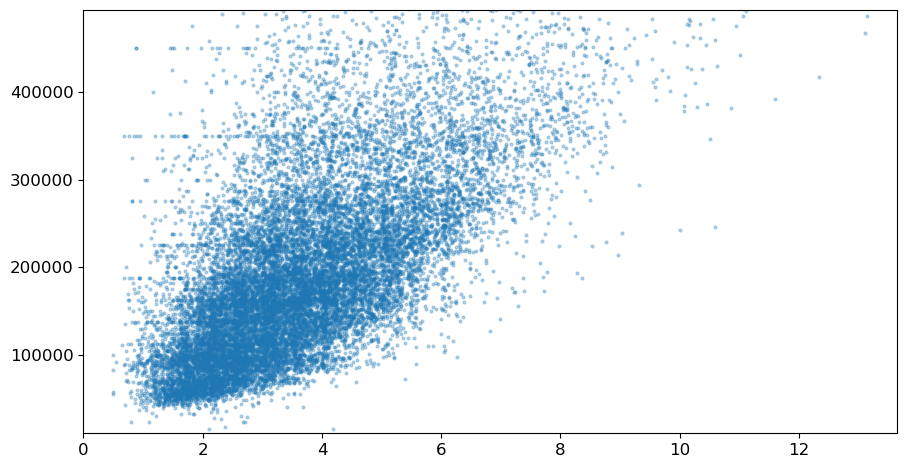

In [394]:
fig, ax = plt.subplots(1,1,figsize=(10.5,5.5))
import matplotlib.colors as mcolors
tblue = mcolors.TABLEAU_COLORS['tab:blue']
tred = mcolors.TABLEAU_COLORS['tab:red']

X,y = sensible_df[['median_income']], sensible_df['median_house_value']
xmin,xmax = X.min(),X.max()
xmin,xmax = xmin.values[0],xmax.values[0]
ymin,ymax = y.min(),y.max()

# Scatterplot the actual test points.  Small size, low alpha.
ax.scatter(X,y,s=4,color = tblue,alpha=.3)

## Choose plot boundaries, cropping off the points at the artificial max
xdelta,ydelta = .5,5_000
plt.axis([xmin-xdelta, xmax+xdelta, ymin-ydelta, ymax-ydelta])
plt.show()

But note if there is a third data  dimension of the appropriate sort, data that looks like this
in one projection may look linear in others.  So we need to a do a **complete** analysis,
looking at all variable pairings to even make a first guess.  And even that won't always work
(if the hyperplane that describes the linearity has too many diomensions).

Of course sopme data **are** nonlinear, and this data may be an example.  But there's another more serious
problem.

The variables we have in hand just collectively don't have enough oinformation to
do good regression.  In that case we either get more ionformation, or we have to be content
with lower R2-values.

### Linearity in higher dimensions 

When we look at a projection of linear data onto a lower number of dimensions,
we can completely miss the linear structure.  The plot on the left shows that the X,Y,Z points lie on a plane.  The plot on the right is a projection of 250 randomly selected points from that plane
on to the XZ plane.   The linear structure is gone. 

In [136]:
a,b,c

(-1, -1, -3)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random


#ax + by + cz + d = 0
# z = -a/c x -b/c y - d
# Trythis form
# z = ax + b y + c
# z = x + y + c (a=1,b=1,c=intercept)

a,b,c = 1,1,-3
def f(x,y):
    return a*x + b*y + c

x = np.linspace(0,3)
y = np.linspace(0,3)
X,Y = np.meshgrid(x,y)
Z = f(X, Y)

Draw a plot:

ax.azim=-60
ax.elev=30


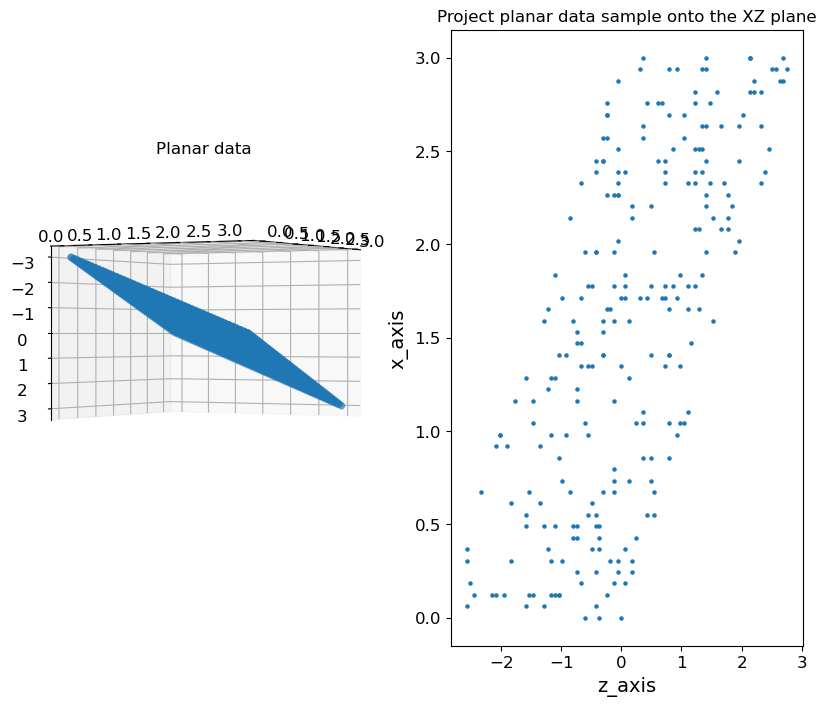

In [179]:
fig = plt.figure(figsize=(10,8))
ax0 = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(122)


ax0.scatter(X, Y, Z,)
ax0.view_init(-180, -30)  # From ??
ax0.set_title("Planar data")

# Plot projection of plane onto XZ plane
XX,YY, ZZ = X.ravel(),Y.ravel(), Z.ravel()
indices = np.array([random.randint(0,2499) for i in range(250)])
xp,yp, zp = XX[indices], YY[indices], ZZ[indices]
ax1.scatter(zp,xp,s=5)
ax1.set_ylabel('x_axis')
ax1.set_xlabel('z_axis')
print(f'{ax.azim=}')
print(f'{ax.elev=}')
T = ax1.set_title("Project planar data sample onto the XZ plane")

But in fact linear regression will work perfectly.

Put the randomly sampled data into 2D array form.

In [169]:
#data = np.concatenate([XX[:,np.newaxis],YY[:,np.newaxis]],axis=1)
X_train = np.concatenate([xp[:,np.newaxis],yp[:,np.newaxis]],axis=1)
z_train = zp

In [170]:
## Take another sample for test data
test_indices = np.array([random.randint(0,2499) for i in range(250)])
xp0,yp0,z_test = XX[test_indices], YY[test_indices], ZZ[test_indices]
X_test = np.concatenate([xp0[:,np.newaxis],yp0[:,np.newaxis]],axis=1)

In [171]:
lin1 = linear_model.LinearRegression()
lin1.fit(X_train,z_train)

LinearRegression()

In [172]:
predictions = lin1.predict(X_test)

In [173]:
r2_score(z_test,predictions,),mean_squared_error(z_test,predictions,)

(1.0, 2.647811628374326e-30)

So what we've demonstrated with toy data is that a sample of perfectly linear data can look nonlinear if we
only look at a projection (2 of the 3 dimensions).  And that linear regression can work fine on data like
this (because it **is** linear, the equation generating it is the equation of a plane).  The R2 is a perfect
1.0.  And the MSE is practically undetectable.

Of course real data is never this perfectly linear; there is usually
noise, we won't usually have our hands on all the relevant variables. So these results are a little 
fantasy like.

But the take away here is the visual.  The randomly sampled data is not just **approximately** linear. It meets the mathematical ideal of linearity.    The regression found the exact parameters we
used to generate the data:

In [177]:
print(a,b,c)
print(f"{lin1.coef_[0]:.1f} {lin1.coef_[1]:.1f} {lin1.intercept_:.1f}")

1 1 -3
1.0 1.0 -3.0


And it still looks like a mess as a projection.

In [174]:
df0 = pd.DataFrame(X_train,columns=['x','y'])
df0['z'] = z_train

Checking that the alignment of the sample still conforms to the equation

In [175]:
z = a*df0['x'] + b*df0['y'] + c
(z ==  df0["z"]).all()

True

And showing what an imperfect tool correlation can be for exposing linearity: `x` and `y` both have strong
but imperfect correlations to `z` (note the same x-value can correspond to multiple z-values, so the correlation can't be perfect).

In [176]:
df0.corr()

,x,y,z
x,1.000000,0.007567,0.711829
y,0.007567,1.000000,0.707719
z,0.711829,0.707719,1.000000
